<a href="https://colab.research.google.com/github/shivanshuss07/2024-C-Training/blob/main/potato_apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
print(os.listdir("/content/drive/MyDrive/PlantVillage"))
print(len(os.listdir("/content/drive/MyDrive/PlantVillage")))
print(os.listdir("/content/drive/MyDrive/PlantVillage")[:5])

['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']
3
['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']


In [ ]:
print(len(os.listdir("/content/drive/MyDrive/PlantVillage/Potato___Early_blight")))
print(os.listdir("/content/drive/MyDrive/PlantVillage/Potato___Early_blight")[:5])

1000
['0ad3ba53-f01b-403b-a99d-5991eed85045___RS_Early.B 7600.JPG', '02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG', '0fd22207-cb37-42a1-965f-7dfe43f9d579___RS_Early.B 6876.JPG', '028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG', '08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG']


In [ ]:
# Dataset Path
base_dir = '/content/drive/MyDrive/PlantVillage'

(256, 256, 3)


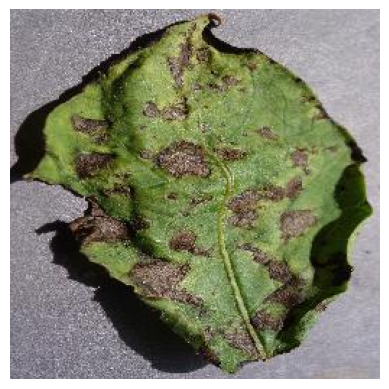

In [ ]:
image_path = '/content/drive/MyDrive/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[123 120 127]
  [161 158 165]
  [148 145 152]
  ...
  [174 171 178]
  [171 168 175]
  [169 166 173]]

 [[131 128 135]
  [148 145 152]
  [142 139 146]
  ...
  [184 181 188]
  [180 177 184]
  [176 173 180]]

 [[150 147 154]
  [134 131 138]
  [132 129 136]
  ...
  [179 176 183]
  [175 172 179]
  [172 169 176]]

 ...

 [[149 145 159]
  [117 113 127]
  [130 126 140]
  ...
  [160 158 169]
  [161 159 172]
  [161 159 172]]

 [[108 104 118]
  [105 101 115]
  [126 122 136]
  ...
  [162 160 171]
  [163 161 174]
  [164 162 175]]

 [[147 143 157]
  [ 93  89 103]
  [128 124 138]
  ...
  [169 167 178]
  [172 170 183]
  [173 171 184]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 64

In [ ]:
# Image Data Generators with Augmentation and Segmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% of data for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Original Dataset Size: 3
Effective Dataset Size after Augmentation: 15


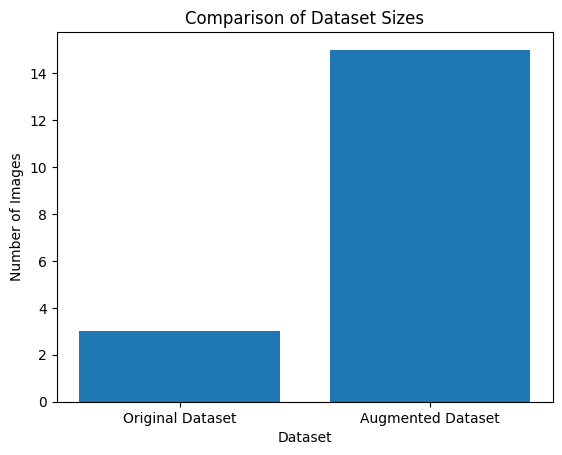

In [ ]:
# Calculate the effective size of the dataset after augmentation
original_dataset_size = len(os.listdir(base_dir))  # Number of original images in the dataset
augmentation_factor = 5  # Number of augmented images generated per original image
effective_dataset_size = original_dataset_size * augmentation_factor

print("Original Dataset Size:", original_dataset_size)
print("Effective Dataset Size after Augmentation:", effective_dataset_size)

# Plot the comparison
plt.bar(['Original Dataset', 'Augmented Dataset'], [original_dataset_size, effective_dataset_size])
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Comparison of Dataset Sizes')
plt.show()

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 1722 images belonging to 3 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 430 images belonging to 3 classes.


In [ ]:
import cv2

In [ ]:
def segment_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # You can apply further processing like morphology operations, contour detection, etc.
    # For simplicity, I'm just returning the binary thresholded image
    return thresh

In [ ]:
image_path = '/content/drive/MyDrive/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'
segmented_img = segment_image(image_path)

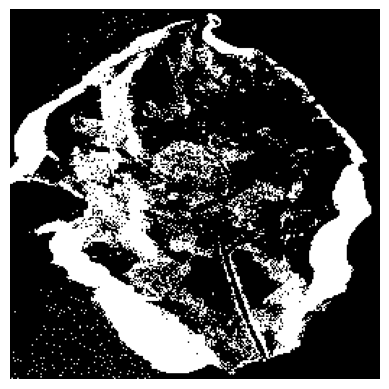

In [ ]:
plt.imshow(segmented_img, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
from keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # New Convolutional Layer
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # New Convolutional Layer
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # Increased number of units in Dense layer
model.add(layers.Dropout(0.4))  # Adjusted dropout rate for regularization
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=50,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/50
26/26 [==============================] - 835s 32s/step - loss: 2.4337 - accuracy: 0.6984 - val_loss: 1.0346 - val_accuracy: 0.4740
Epoch 2/50
26/26 [==============================] - 11s 425ms/step - loss: 0.3469 - accuracy: 0.8721 - val_loss: 0.9804 - val_accuracy: 0.7500
Epoch 3/50
26/26 [==============================] - 11s 422ms/step - loss: 0.2224 - accuracy: 0.9119 - val_loss: 0.7245 - val_accuracy: 0.7422
Epoch 4/50
26/26 [==============================] - 12s 455ms/step - loss: 0.1672 - accuracy: 0.9349 - val_loss: 0.5774 - val_accuracy: 0.8385
Epoch 5/50
26/26 [==============================] - 11s 431ms/step - loss: 0.1130 - accuracy: 0.9608 - val_loss: 0.4990 - val_accuracy: 0.8516
Epoch 6/50
26/26 [==============================] - 11s 434ms/step - loss: 0.0688 - accuracy: 0.9741 - val_loss: 0.4538 - val_accuracy: 0.8568
Epoch 7/50
26/26 [==============================] - 11s 436ms/step - loss: 0.1024 - accuracy: 0.9572 - val_loss: 0.4417 - val_accuracy: 0.8802


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
6/6 [==============================] - 2s 294ms/step - loss: 0.0719 - accuracy: 0.9896
Validation Accuracy: 98.96%


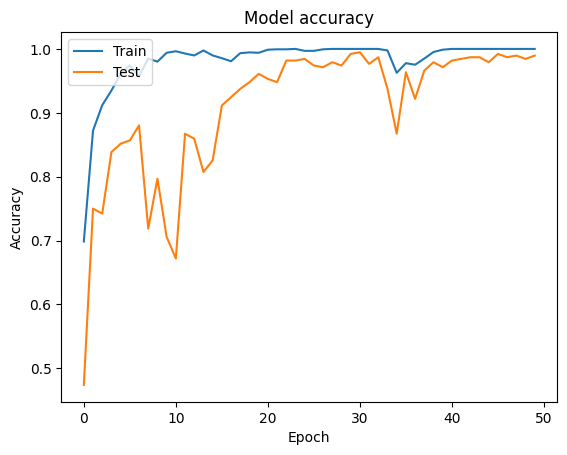

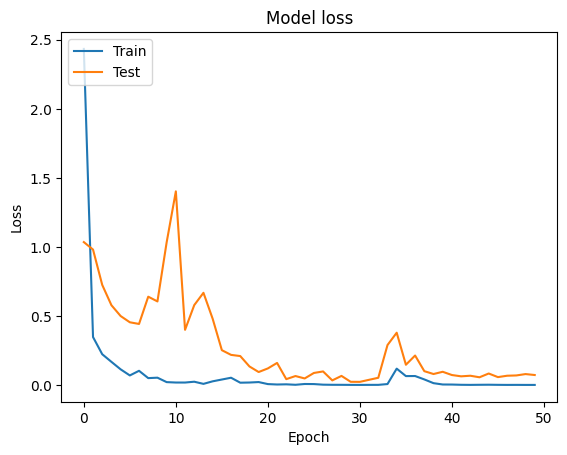

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Potato___Early_blight', 1: 'Potato___Late_blight', 2: 'Potato___healthy'}

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/PE_Blight.jpeg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 450ms/step
Predicted Class Name: Potato___Early_blight


In [ ]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('plant_disease_prediction_model.h5')